#**Time Series Analysis Assignment - Gold Prices (XAU/USD)**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### **1. Data Loading and Preparation:**

---



**Loading the data -**

In [ ]:
df=pd.read_excel(r"/content/Gold.xlsx", parse_dates=True)
df.head()

,datetime,open,close,average price
0,2010-01-03 18:00:00,1098.45,1099.95,1099.200
1,2010-01-03 18:05:00,1100.00,1099.75,1099.875
2,2010-01-03 18:10:00,1099.70,1099.45,1099.575
3,2010-01-03 18:15:00,1099.50,1099.45,1099.475
4,2010-01-03 18:20:00,1099.40,1098.90,1099.150


In [ ]:
df.shape

(986004, 4)

**Data Cleaning -**

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'],errors='coerce')
delete_years=[2010,2011,2012]
df=df[~df['datetime'].dt.year.isin(delete_years)]

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df['date']=df['datetime'].dt.date
df.insert(0, 'date', df.pop('date'))
df.head()

,date,datetime,open,close,average price
0,2013-01-01,2013-01-01 17:00:00,1674.90,1674.90,1674.900
1,2013-01-01,2013-01-01 18:00:00,1675.11,1673.36,1674.235
2,2013-01-01,2013-01-01 18:05:00,1673.33,1673.33,1673.330
3,2013-01-01,2013-01-01 18:10:00,1673.37,1673.27,1673.320
4,2013-01-01,2013-01-01 18:15:00,1673.32,1673.16,1673.240


In [ ]:
df=df.drop(columns=['datetime','open','close'])
df=df.rename(columns={'average price': 'avg_price'})
df.head()

,date,avg_price
0,2013-01-01,1674.900
1,2013-01-01,1674.235
2,2013-01-01,1673.330
3,2013-01-01,1673.320
4,2013-01-01,1673.240


In [ ]:
data=df.groupby('date').agg({'date':'first','avg_price':'mean'}).reset_index(drop=True)
data.head()

,date,avg_price
0,2013-01-01,1674.672055
1,2013-01-02,1685.993943
2,2013-01-03,1671.660394
3,2013-01-04,1645.249338
4,2013-01-06,1658.975208


In [ ]:
data.set_index('date',inplace=True)

In [ ]:
data.shape

(3418, 1)

###**2. Plot the Time Series.**

---



Text(0, 0.5, 'USD per ounce of gold')

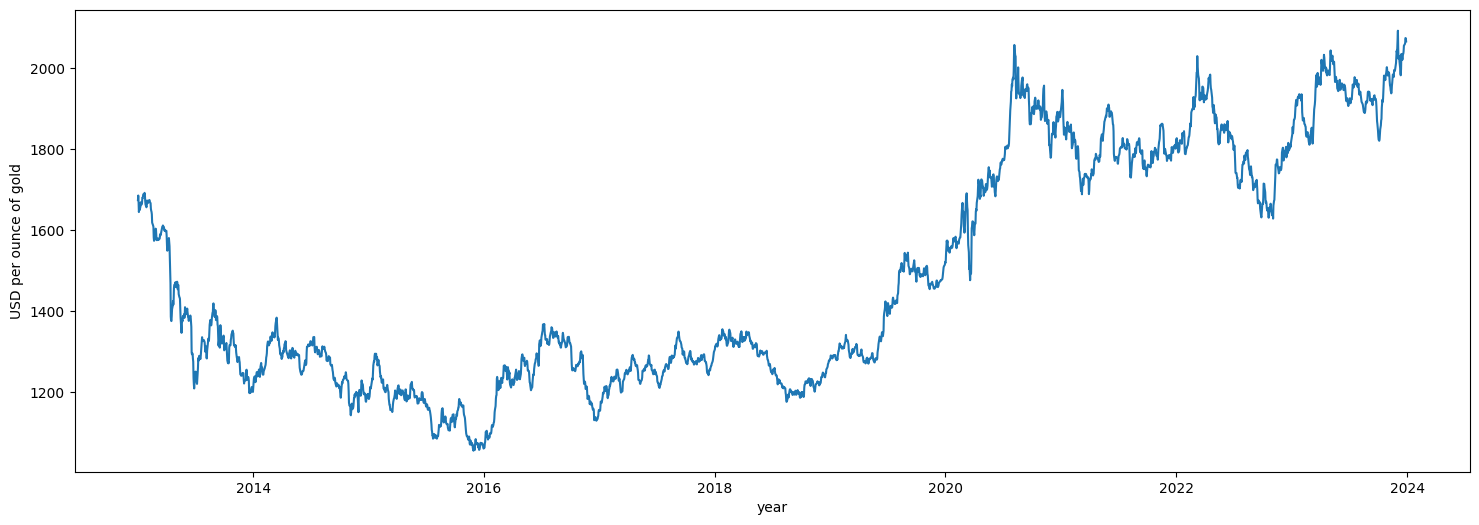

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(data)
plt.xlabel('year')
plt.ylabel('USD per ounce of gold')

###**3. Extract the Components of Time series.**

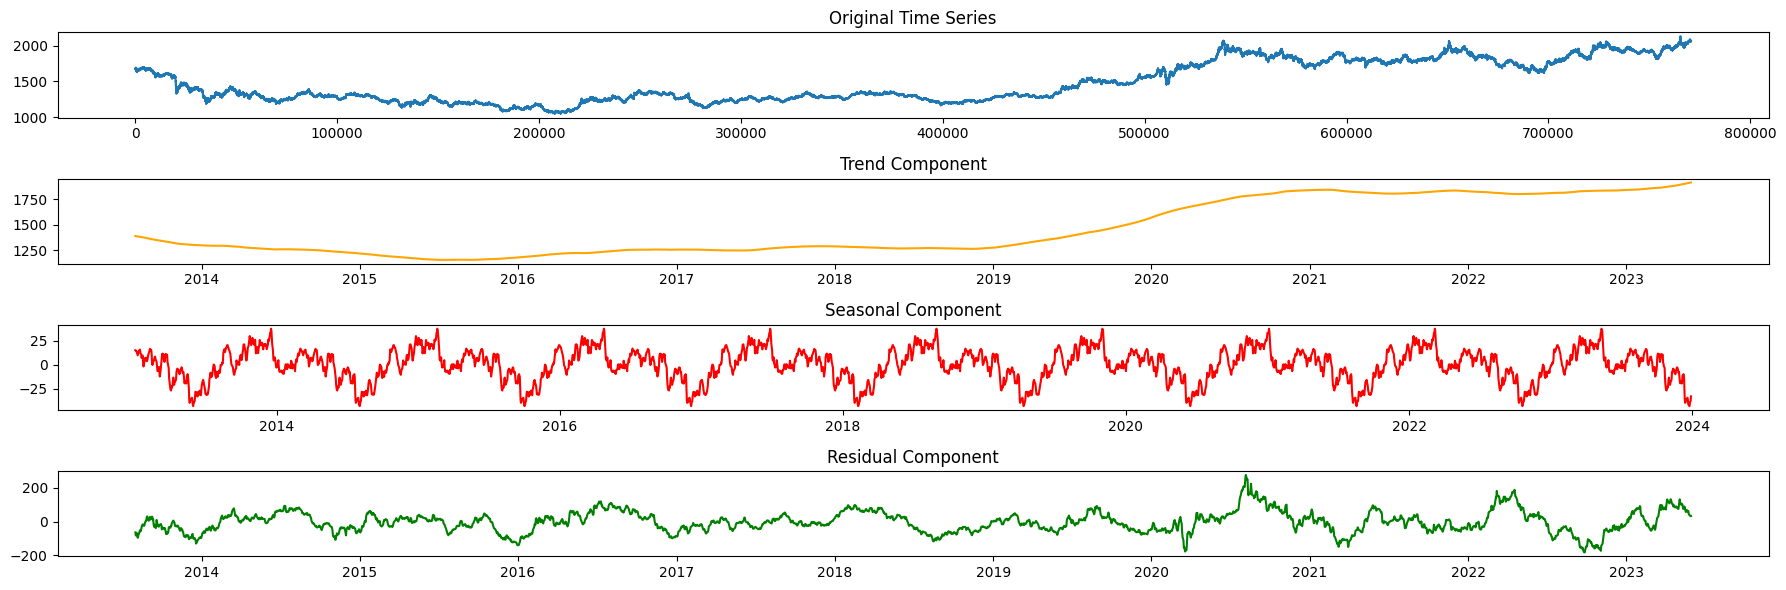

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
decompose = seasonal_decompose(data['avg_price'], model='add', period=365)
trend=decompose.trend
seasonality=decompose.seasonal
residual=decompose.resid
fig, ax=plt.subplots(4, 1,figsize=(18,6))
ax[0].plot(df.index, df['avg_price'], label='Original')
ax[0].set_title('Original Time Series')
ax[1].plot(trend.index, trend, label='Trend', color='orange')
ax[1].set_title('Trend Component')
ax[2].plot(seasonality.index, seasonality, label='Seasonal', color='red')
ax[2].set_title('Seasonal Component')
ax[3].plot(residual.index, residual, label='Residual', color='green')
ax[3].set_title('Residual Component')
plt.tight_layout()
plt.show()

###**4. Check whether Stationary or Non-stationary.**

---



In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
result=adfuller(data,autolag='AIC')
stats=pd.Series(result[0:4],index=['Test Statistic','p-value', 'No. of lags used', 'number of observations used'])
print(stats)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")

Test Statistic                   -0.322953
p-value                           0.922190
No. of lags used                 21.000000
number of observations used    3396.000000
dtype: float64
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Non-Stationary


###**5. Making the Data Stationary.**

---



In [ ]:
df=data[['avg_price']]
df['shift']=df.avg_price.shift()
df['shiftDiff']=df.avg_price - df['shift']
df.tail(8)

,avg_price,shift,shiftDiff
date,,,
2023-12-20,2035.847699,2034.484656,1.363043
2023-12-21,2041.605109,2035.847699,5.757409
2023-12-22,2055.809216,2041.605109,14.204107
2023-12-25,2059.837431,2055.809216,4.028215
2023-12-26,2062.703207,2059.837431,2.865776
2023-12-27,2074.760525,2062.703207,12.057319
2023-12-28,2074.235996,2074.760525,-0.524529
2023-12-29,2066.480270,2074.235996,-7.755727


In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.shiftDiff.dropna(),autolag='AIC')
stats=pd.Series(result[0:4],index=['Test Statistic','p-value', 'No. of lags used', 'number of observations used'])
print(stats)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Time Series is Stationary")
else:
    print ("Time Series is Non-Stationary")

Test Statistic                -1.386849e+01
p-value                        6.530501e-26
No. of lags used               2.000000e+01
number of observations used    3.396000e+03
dtype: float64
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


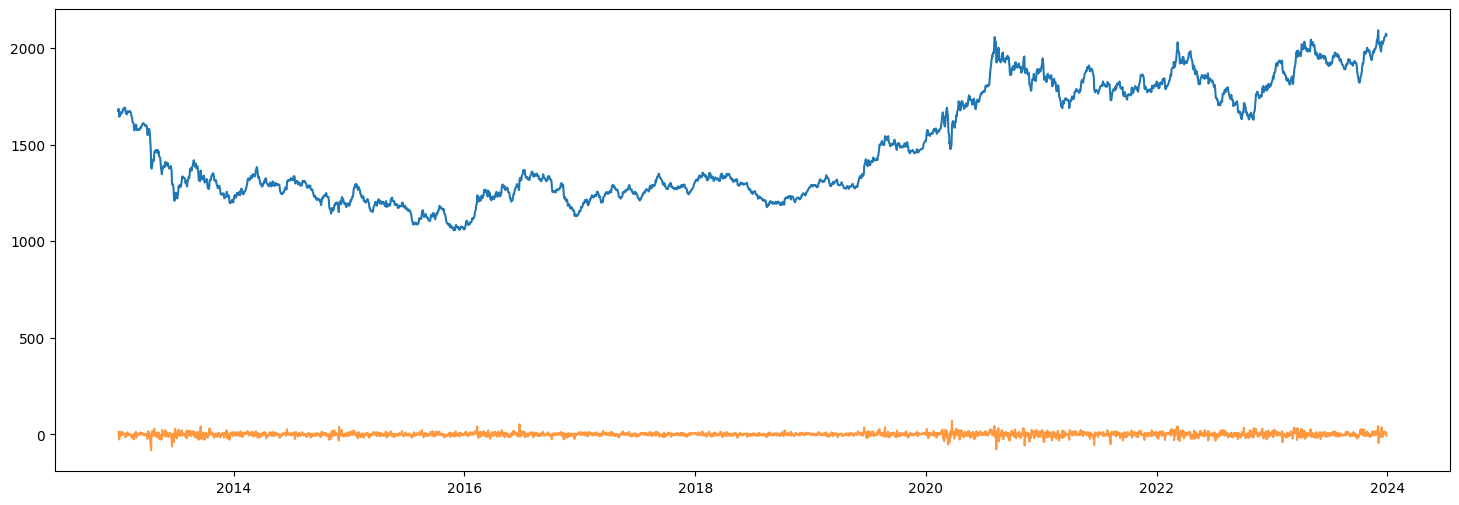

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(df.index, df.avg_price)
plt.plot(df.index, df.shiftDiff, alpha=0.8)
plt.show()

###**6. Implementing ARIMA model**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(df['shiftDiff'].dropna(),trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=25005.659, Time=9.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25415.290, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25047.484, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25008.513, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25413.742, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=25004.628, Time=6.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=25009.596, Time=3.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25009.645, Time=1.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=25005.809, Time=9.96 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=25011.178, Time=3.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25011.427, Time=3.68 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=25006.916, Time=12.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=25002.903, Time=1.91 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=25007.870, Time=0.42 sec
 ARIMA(1,0,1)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3417
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -12497.452
Date:                Wed, 17 Apr 2024   AIC                          25002.903
Time:                        07:01:25   BIC                          25027.449
Sample:                             0   HQIC                         25011.674
                               - 3417                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8458      0.084    -10.061      0.000      -1.011      -0.681
ma.L1          1.2095      0.084     14.400      0.000       1.045       1.374
ma.L2          0.3260      0.027     12.139      0.000       0.273       0.379
sigma2        87.9654      1.044     84.259      0.000      85.919      90.012
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              6128.48
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###**7. Validating the Model.**

---



In [ ]:
train=df.iloc[:-18]
test=df.iloc[-18:]
print(train.shape,test.shape)

(3400, 3) (18, 3)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['shiftDiff'],order=(1,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              shiftDiff   No. Observations:                 3400
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -12427.517
Date:                Wed, 17 Apr 2024   AIC                          24865.034
Time:                        07:45:15   BIC                          24895.691
Sample:                             0   HQIC                         24875.991
                               - 3400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1059      0.225      0.472      0.637      -0.334       0.546
ar.L1         -0.8425      0.089     -9.435      0.000      -1.017      -0.667
ma.L1          1.2035      0.089     13.482      0.000       1.029       1.378
ma.L2          0.3222      0.028     11.332      0.000       0.266       0.378
sigma2        87.7516      1.059     82.851      0.000      85.676      89.828
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              6222.02
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

3400   -0.885281
3401    0.860717
3402   -0.529932
3403    0.641627
3404   -0.345358
3405    0.486131
3406   -0.214360
3407    0.375772
3408   -0.121387
3409    0.297447
3410   -0.055402
3411    0.241857
3412   -0.008570
3413    0.202403
3414    0.024668
3415    0.174402
3416    0.048258
3417    0.154528
Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='date'>

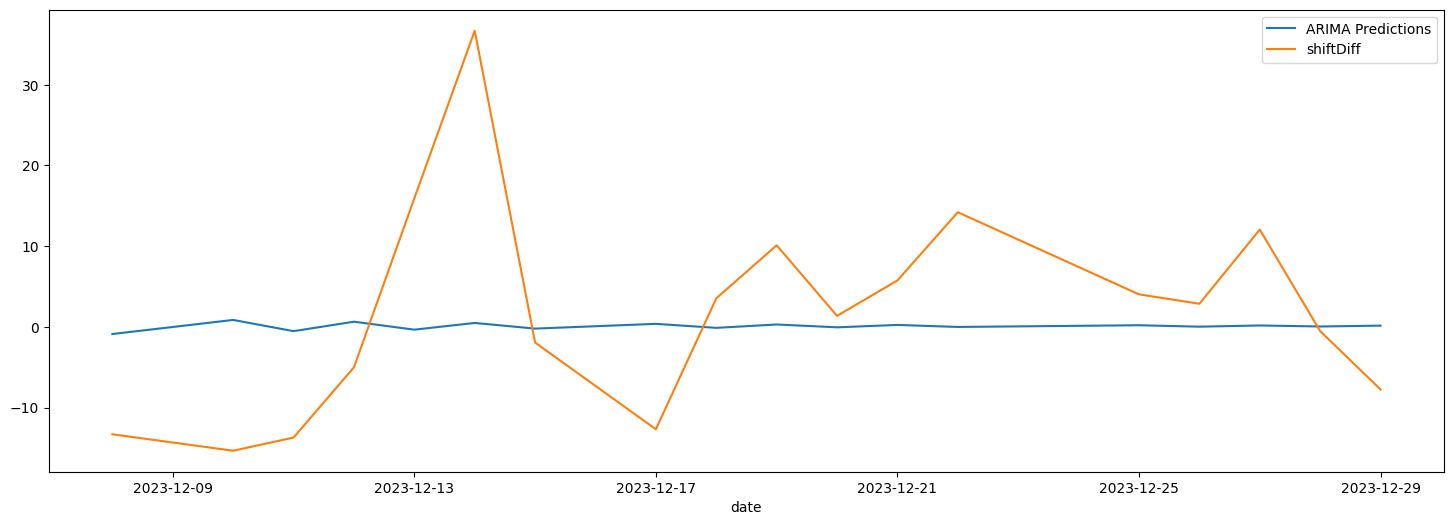

In [ ]:
start=len(train)
end=len(train)+len(test)-1
shiftDiff_pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(shiftDiff_pred)
shiftDiff_pred.index=df.index[start:end+1]
plt.figure(figsize=(18,6))
shiftDiff_pred.plot(legend=True)
test['shiftDiff'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['shiftDiff'].mean()
rmse=sqrt(mean_squared_error(shiftDiff_pred,test['shiftDiff']))
print(rmse)

12.788660986749893


In [ ]:
shiftDiff_pred=shiftDiff_pred+df['shift'][-18:]

In [ ]:
Results=pd.concat([df['avg_price'][-18:], shiftDiff_pred], axis=1)
Results.rename(columns={0:'predictions'}, inplace=True)

In [ ]:
Results

,avg_price,predictions
date,,
2023-12-08,2016.916544,2029.341875
2023-12-10,2001.570069,2017.777262
2023-12-11,1987.853243,2001.040138
2023-12-12,1982.839583,1988.494869
2023-12-13,1998.771902,1982.494226
2023-12-14,2035.471268,1999.258034
2023-12-15,2033.524975,2035.256908
2023-12-17,2020.837222,2033.900747
2023-12-18,2024.372772,2020.715835


### **8. Predictions and Original data.**

---



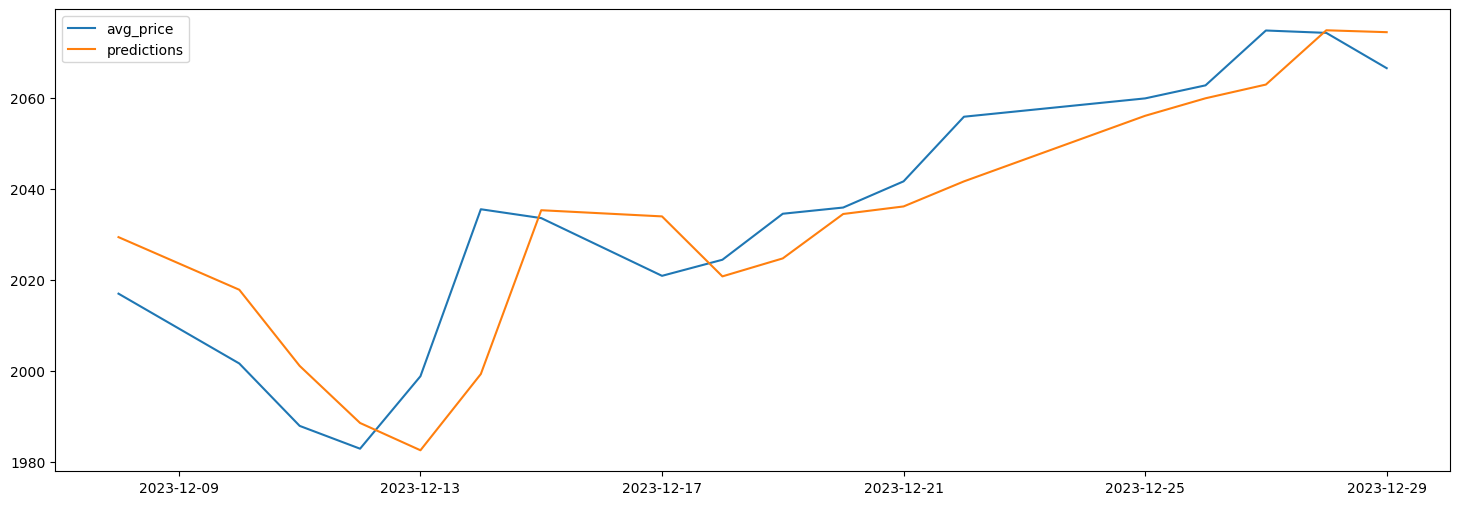

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(Results)
plt.legend(Results)
plt.show()